In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# with open('the-verdict.txt', 'r', encoding='utf-8') as file:
#     text = file.read()
#     text = text.lower()


In [ ]:
text = """
artificial intelligence is transforming modern society.
it is used in healthcare finance education and transportation.
machine learning allows systems to improve automatically with experience.
data plays a critical role in training intelligent systems.
large datasets help models learn complex patterns.
deep learning uses multi layer neural networks.
neural networks are inspired by biological neurons.
each neuron processes input and produces an output.
training a neural network requires optimization techniques.
gradient descent minimizes the loss function.

natural language processing helps computers understand human language.
text generation is a key task in nlp.
language models predict the next word or character.
recurrent neural networks handle sequential data.
lstm and gru models address long term dependency problems.
however rnn based models are slow for long sequences.

transformer models changed the field of nlp.
they rely on self attention mechanisms.
attention allows the model to focus on relevant context.
transformers process data in parallel.
this makes training faster and more efficient.
modern language models are based on transformers.

education is being improved using artificial intelligence.
intelligent tutoring systems personalize learning.
automated grading saves time for teachers.
online education platforms use recommendation systems.
technology enhances the quality of learning experiences.

ethical considerations are important in artificial intelligence.
fairness transparency and accountability must be ensured.
ai systems should be designed responsibly.
data privacy and security are major concerns.
researchers continue to improve ai safety.

text generation models can create stories poems and articles.
they are used in chatbots virtual assistants and content creation.
generated text should be meaningful and coherent.
evaluation of text generation is challenging.
human judgement is often required.

continuous learning is essential in the field of ai.
research and innovation drive technological progress.
students should build strong foundations in mathematics.
programming skills are important for ai engineers.
practical experimentation enhances understanding.

"""


#N-Gram Language Model

In [ ]:
import re
corpus = text.lower()
corpus = re.sub(r'[^a-z\s]', '', corpus)

tokens = corpus.split()
print("Total tokens:", len(tokens))


Total tokens: 298


#build n-gram model

In [ ]:
from collections import defaultdict

n = 3
ngram_model = defaultdict(list)

for i in range(len(tokens) - n + 1):
    context = tuple(tokens[i:i+n-1])
    next_word = tokens[i+n-1]
    ngram_model[context].append(next_word)

print("Total unique contexts:", len(ngram_model))


Total unique contexts: 281


In [ ]:
import random

def predict_next_word(context):
    context = tuple(context.lower().split())
    if context in ngram_model:
        return random.choice(ngram_model[context])
    else:
        return None


In [ ]:
print(predict_next_word("artificial intelligence"))


is


In [ ]:
print(predict_next_word("intelligence is"))


transforming


In [ ]:
print(predict_next_word("is transforming"))


modern


In [ ]:
print(predict_next_word("raghava is"))

None


In [ ]:
def generate_text_ngram(seed_text, length=30):
    words = seed_text.lower().split()

    for _ in range(length):
        context = tuple(words[-(n-1):])
        if context in ngram_model:
            words.append(random.choice(ngram_model[context]))
        else:
            break

    return " ".join(words)


In [ ]:
print(generate_text_ngram("artificial intelligence", 20))


artificial intelligence is transforming modern society it is used in chatbots virtual assistants and content creation generated text should be designed responsibly


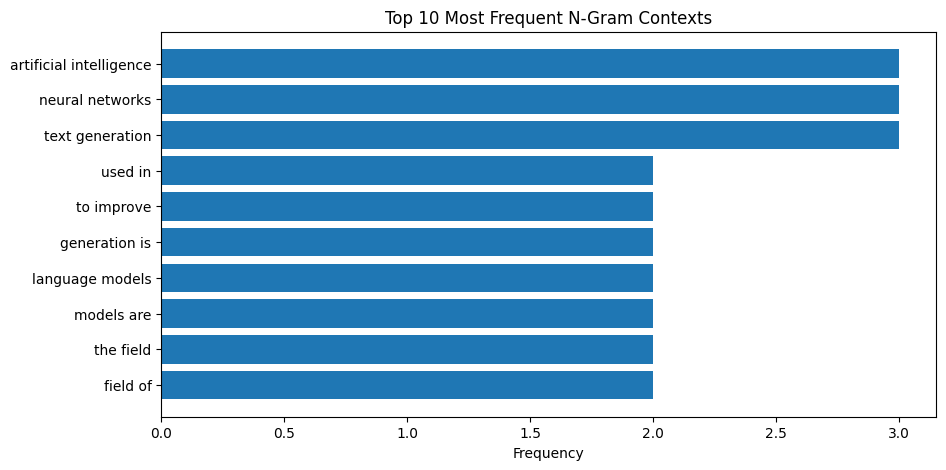

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

context_counts = Counter({k: len(v) for k, v in ngram_model.items()})
top_contexts = context_counts.most_common(10)

labels = [' '.join(k) for k, _ in top_contexts]
values = [v for _, v in top_contexts]

plt.figure(figsize=(10,5))
plt.barh(labels, values)
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent N-Gram Contexts")
plt.gca().invert_yaxis()
plt.show()


#RNN to overcome N-Gram

In [ ]:
import numpy as np
import re

# Clean text
corpus = text.lower()
corpus = re.sub(r'[^a-z\s]', '', corpus)

tokens = corpus.split()


In [ ]:
# Vocabulary
vocab = sorted(set(tokens))
word_to_id = {w:i for i,w in enumerate(vocab)}
id_to_word = {i:w for w,i in word_to_id.items()}
vocab_size = len(vocab)

# Encode corpus
encoded = [word_to_id[w] for w in tokens]


In [ ]:
seq_len = 5
X, y = [], []

for i in range(len(encoded) - seq_len):
    X.append(encoded[i:i+seq_len])
    y.append(encoded[i+seq_len])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (293, 5)
y shape: (293,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential([
    Embedding(vocab_size, 64, input_length=seq_len),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])

rnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = rnn_model.fit(
    X, y,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.0044 - loss: 5.2690
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1967 - loss: 5.1819 
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3598 - loss: 5.1042 
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3415 - loss: 4.9734 
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1471 - loss: 4.7754 
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1294 - loss: 4.4786 
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3015 - loss: 4.0521 
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4082 - loss: 3.6388 
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4519 - loss: 3.1459 
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5670 - loss: 2.6860 
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6849 - loss: 2.3264 
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 

In [ ]:
def generate_text_rnn(model, seed_text, steps=30):
    words = seed_text.lower().split()

    for _ in range(steps):
        seq = [word_to_id[w] for w in words[-seq_len:]]
        seq = np.array(seq).reshape(1, -1)

        pred = np.argmax(model.predict(seq, verbose=0))
        words.append(id_to_word[pred])

    return " ".join(words)


In [ ]:
print(generate_text_rnn(rnn_model, "artificial intelligence", 20))


artificial intelligence intelligent transparency and personalize learning models ensured network time field learning designed descent for on datasets security natural changed improved


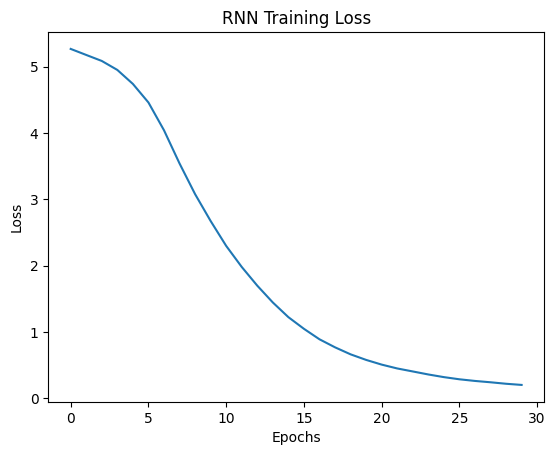

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RNN Training Loss")
plt.show()


### Text Preprocessing & Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


### Build LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [ ]:
model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0062 - loss: 5.2726    
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0337 - loss: 5.2561 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0485 - loss: 5.2169 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0228 - loss: 5.0888 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0202 - loss: 4.9699     
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0336 - loss: 4.9106 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0441 - loss: 4.8718 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0461 - loss: 4.7988 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0536 - loss: 4.7560 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0315 - loss: 4.7867     
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0608 - loss: 4.7152 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (32, 9, 64)            │        12,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 100)              │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 195)              │        19,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 294,527 (1.12 MB)

 Trainable params: 98,175 (383.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196,352 (767.00 KB)

### Text Generation

In [ ]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0))
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

print(generate_text("artificial intelligence", 10))


artificial intelligence is transforming modern society society and experience creation problems problems


In [ ]:
print(generate_text("raghava is artificial intelligence ",5))

raghava is artificial intelligence  is transforming modern society and


In [ ]:
print(generate_text("artificial intelligence ",10))

artificial intelligence  is transforming modern society society and experience creation problems problems


### Transformer Based Text Generation (Basic)

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [ ]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [ ]:
print(len(preprocessed))


4690


## Step 2: Creating Token IDs

In [ ]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1130


In [ ]:
vocab = {token:integer for integer,token in enumerate(all_words)}


In [ ]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [ ]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer.decode(ids)


'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [ ]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [ ]:
len(vocab.items())


1132

In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer.encode(text)


[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

### BYTE PAIR ENCODING


In [ ]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [ ]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [ ]:
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [ ]:
enc_sample = enc_text[50:]


In [ ]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [ ]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
import torch
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.9.0+cu126
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [ ]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [ ]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [ ]:
input_ids = torch.tensor([2, 3, 5, 1])


In [ ]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [ ]:
print(embedding_layer(torch.tensor([3])))


tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


**POSITIONAL EMBEDDINGS (ENCODING WORD POSITIONS)**

In [ ]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [ ]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
import torch
import torch.nn as nn

class TransformerLanguageModel(nn.Module):
    def __init__(
        self,
        vocab_size,
        d_model=128,
        n_heads=4,
        n_layers=2,
        ff_dim=512,
        dropout=0.1
    ):
        super().__init__()

        # Token embedding
        self.token_embedding = nn.Embedding(vocab_size, d_model)

        # Positional embedding (you already implemented this)
        self.positional_embedding = PositionalEncoding(d_model)

        # Transformer Encoder layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True
        )

        # Stack of encoder layers
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=n_layers
        )

        # Output layer → vocabulary size
        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        """
        x: (batch_size, seq_len)
        """

        # Token embedding
        x = self.token_embedding(x)

        # Add positional encoding
        x = self.positional_embedding(x)

        # ---- Causal Mask (VERY IMPORTANT) ----
        seq_len = x.size(1)
        causal_mask = torch.triu(
            torch.ones(seq_len, seq_len),
            diagonal=1
        ).bool().to(x.device)

        # Transformer Encoder
        x = self.transformer_encoder(x, mask=causal_mask)

        # Output logits
        logits = self.fc_out(x)
        return logits


In [ ]:
model = TransformerLanguageModel(vocab_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 10
batch_size = 64

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for i in range(0, len(X), batch_size):
        xb = X[i:i+batch_size].to(device)
        yb = Y[i:i+batch_size].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(xb)

        # Reshape for CrossEntropy
        loss = criterion(
            outputs.view(-1, vocab_size),
            yb.view(-1)
        )

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")


Epoch [1/10], Loss: 495.2550
Epoch [2/10], Loss: 372.4632
Epoch [3/10], Loss: 349.8847
Epoch [4/10], Loss: 316.6556
Epoch [5/10], Loss: 277.0256
Epoch [6/10], Loss: 237.3858
Epoch [7/10], Loss: 201.5984
Epoch [8/10], Loss: 169.9042
Epoch [9/10], Loss: 142.1920
Epoch [10/10], Loss: 118.8985


In [ ]:
import torch.nn.functional as F

def generate_text(
    start_text,
    max_tokens=50,
    temperature=0.8
):
    model.eval()

    words = start_text.lower().split()
    ids = [word2idx[w] for w in words if w in word2idx]

    input_ids = torch.tensor(ids).unsqueeze(0).to(device)

    for _ in range(max_tokens):
        with torch.no_grad():
            outputs = model(input_ids)
            logits = outputs[:, -1, :] / temperature
            probs = F.softmax(logits, dim=-1)

            next_id = torch.multinomial(probs, num_samples=1)

        input_ids = torch.cat([input_ids, next_id], dim=1)

    generated = " ".join(idx2word[i.item()] for i in input_ids[0])
    return generated


In [ ]:
print(generate_text("the court said", max_tokens=40, temperature=0.8))


the said i couldn t know me i saw that face it s an how since i simply answered with any more i had seen a shaking hand on my work and i ll show on him once when he was one


In [ ]:
print(generate_text("raghava said",max_tokens=40,temperature=0.7))

said if i could have given to have stroud he was his resolve i had been mrs gisburn the coming to the end in the tottering foundations you know where to the it was i wouldn t been widow and i
